[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap4/14-Estimation-MOM.ipynb)


# <a name="14intro">4.2: Method of Moments Estimates</a>

---

Estimation is generally the process of predicting the value(s) of unknown population parameters using data collected from a sample. There are different statistical methods that can be applied to a data set to reach the same ultimate goal, such as finding an accurate estimate for a parameter. We explored the method of [maximum likelihood estimation (MLE)](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap4/13-Estimation-MLE.ipynb). With MLE estimation, we find the most likely value of a parameter, $\theta$, by identifying the value for $\theta$ that gives the maximimum value of the likelihood function.

We now explore another estimation method called the <font color="dodgerblue">**method of moments**</font> (commonly
abbreviated as <font color="dodgerblue">**MoM**</font>). Both MLE and MoM estimates are used to answer the same question, what is the value of an unknown population parameter, $\theta$? MoM estimates approach the question following a different objective then MLE. We find the values for the population parameters such that certain properties of the population (for example $\mu_X=E(X)$ and $\sigma^2_X = \mbox{Var}(X)$) are equal to the corresponding statistics (such as the sample mean, $\bar{x}$, and sample variance, $s^2$) that we calculate from a randomly selected sample.



# <a name="14cub">Building a Model for Bear Cub Weight</a>

---


<figure>
<img
src="https://i2.pickpik.com/photos/601/295/670/bear-cub-black-wildlife-preview.jpg"
alt="Black Grizzly Cub" width = "40%"/>
<figcaption aria-hidden="true">
Credit: <a href="https://www.pickpik.com/bear-cub-black-wildlife-animal-nature-112893">"Black Grizzly Bear Cub On Top of Tree"</a>
</figcaption>
</figure>


A biologist is studying black bears. In particular, what distribution best fits the weight (in ounces) of newborn black bear cubs? Their sample data contains 10 observations, $x_1, x_2, \ldots , x_{10}$, corresponding the birth weight of 10 randomly selected black bear cubs.

-   Run the code cell below to “secretly” generate values for parameters that we store in `mu.cub` and `sigma.cub`.
-   A data frame called `cub` is created that has one variable, `wt` that has the sample birth weight data.
-   The command `set.seed(113)` will seed the randomization so we have the same parameter values and sample every time we run it.
-   Do not view the values of `mu.cub` or `sigma.cub` for now. Keep them secret for now!

In [ ]:
set.seed(113)  # fix randomization

mu.cub <- sample(seq(8.6, 9.8, 0.1), size=1)  # set value of mu
sigma.cub <- sample(seq(0.9, 1.3, 0.05), size=1)  # set value of sigma

picked <- rnorm(10, mu.cub, sigma.cub)  # pick a random sample n=10
cub <- data.frame(wt = picked)  # save sample to the cub data frame
round(cub$wt, 2)  # print sample to screen

[1]  9.71  7.77  8.47  7.35  7.83  9.06  8.66  8.74 10.82  8.27

## <a name="14best-fit">What is the Best Fitting Model?</a>

---

From the code cell above, we have generated the following sample of cub birth weights (in ounces) that are stored in `cub$wt`,

$$x = (9.71, 7.77, 8.47, 7.35, 7.83, 9.06, 8.66, 8.74, 10.82, 8.27 ).$$

Our goal is to find the “best” description of the distribution of all black bear cub birth weights. The interpretation of “best” depends on the context of the question and can mean different things to different statisticians.



## <a name="14q1">Question 1</a>

---

The figure below shows a dot plot of the selected sample (size $n=10$)
of cub birth weights along with the plots of 4 different models we could
choose for our data. Answer the questions based on plot figure below.

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/9/9e/14fig-compare-models.png"
alt="Possible Models for Bear Cub Weights" width = "60%"/>
<figcaption aria-hidden="true">Image Credit: Adam Spiegler, <a
href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>,
via Wikimedia Commons</figcaption>
</figure>




### <a name="14q1a">Question 1a</a>

---

Which of the models labeled 1-4 in the plot above do you believe best
fits the sample data cub birth weights?

#### <a name="14sol1a">Solution to Question 1a</a>

---

<br>
<br>
<br>



### <a name="14q1b">Question 1b</a>

---

What type of continuous distribution best matches the graph you
selected? Explain why in terms of birth weights of black bear cubs this
distribution is reasonable and makes practical sense.

-   *Hint: See the [appendix of common continuous random variables section](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/08-Common-Continuous-Distributions.ipynb#08append) for some options.*

#### <a name="14sol1b">Solution to Question 1b</a>

---

<br>
<br>
<br>



### <a name="14q1c">Question 1c</a>

Using the sample of birth weights `cub$wt`, give estimates for each of
the parameter(s) in the distribution you identified in [Question 1b](#14q1b).

#### <a name="14sol1c">Solution to Question 1c</a>

---

In [ ]:
# be sure you have already run the first code cell and
# stored sample weights to variable `wt` in data frame `cub`



 Based on your code above, what are the values of the parameters of the distribution in [Question 1b](#14q1b)?


<br>
<br>
<br>


## <a name="14model-prop">Identifying Key Properties for Our Model</a>

---

Let $X$ be a random variable with pdf $f(x; \theta_1, \theta_2, \ \ldots \theta_k)$ that depends on parameters $\theta_1, \theta_2, \ldots , \theta_k$. If we independently pick a random variables $X_1, X_2, \ldots X_n$ from population $X$, we can determine the values of $\theta_1, \theta_2, \ldots , \theta_k$ that best fit the data in the following sense:

-   The mean $\mu_X = E(X)$ of the population $X$ equals the sample mean, $\bar{x}$.
-   The variance $\sigma^2_X = \mbox{Var}(X)$ of the population equals the variance of the sample, $s^2$.
-   The skewness of the population equals the skewness of the sample.
-   The "peakiness" (kurtosis) of the population equals the "peakiness" of the sample.
-   $\ldots$ and so on.

For example, in the birth weight of black bear cubs example, we assumed the population of birth weights $X$ is normally distributed. Normal distributions are determined by two parameters, $\mu$ and $\sigma$.

-   The random sample has $\bar{x} = 8.668$. We estimate $E(X) = \mu=\bar{x} = 8.668$.
-   The random sample has $s^2 = 1.032$. We estimate $\mbox{Var(X)} = \sigma^2=s^2=1.032$.

> <font color="dodgerblue">We find values of the parameters so the properties of random variable $X$ are equal to corresponding statistics from our sample.</font>



# <a name="14theory-moments">Theoretical Moments</a>

---

Let $X$ be a random variable with pdf $f(x)$. For a positive integer $k$, the <font color="dodgerblue">**k<sup>th</sup> theoretical moment of $X$**</font> is $\color{dodgerblue}{\mu_k = E \left( X^k \right) }$.

$$\color{dodgerblue}{\boxed{\mu_k = E \left( X^k \right) = \int_{-\infty}^{\infty} x^kf(x) \, dx \ \ \ \mbox{(for continuous)} \qquad \mbox{or} \qquad  \mu_k = E \left( X^k \right) = \sum_X x^kp(x) \ \ \ \mbox{(for discrete)}}},$$



## <a name="14ex-moments">Interpretation of Theoretical Moments</a>

---

-   The <font color="dodgerblue">**first moment**</font> is $\color{dodgerblue}{\mu_1 = E \left( X \right) }$.
   -   $\mu_1$ is the <font color="dodgerblue">**mean**</font>.
-   The <font color="tomato">**second moment**</font> is $\color{tomato}{\mu_2 = E \left( X^2 \right) }$.
    -   $\mu_2$ is related *(but not equal)* to the <font color="tomato">**variance**</font>.
    -   If we can find $\mbox{Var}(X)$ and have computed the first theoretical moment, $\mu_1$, we have:

$${\color{tomato}{\mu_{2}}} = \mbox{Var}(X) + \mu_1^2 \qquad \mbox{since} \qquad \mbox{Var}(X) = E \big( (X-\mu_1)^2 \big) = {\color{tomato}{E(X^2)}} - \mu_1^2 = {\color{tomato}{\mu_{2}}} - \mu_1^2.$$

-   The <font color="mediumseagreen">**third moment**</font> is   $\color{mediumseagreen}{\mu_3 = E \left( X^3 \right) }$.
    -   $\mu_3$ is related to the <font color="mediumseagreen">**skewness**</font> of $X$ which is       defined as $E \big( (X-\mu_1)^3 \big)$


<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png"
alt="Comparing Plots of Skewness" width = "75%"/>
<figcaption aria-hidden="true">
Credit: Diva Jain, <a href="(https://creativecommons.org/licenses/by-sa/4.0)">CC BY-SA 4.0</a>, via <a href="https://commons.wikimedia.org/wiki/File:Relationship_between_mean_and_median_under_different_skewness.png)">Wikimedia Commons</a>
</figcaption>
</figure>


-   The <font color="mediumpurple">**fourth moment**</font> is   $\color{mediumpurple}{\mu_4 = E \left( X^4 \right) }$.
    -   $\mu_4$ is related to the <font color="mediumpurple">**kurtosis**</font> of $X$ which is       defined as $E \big( (X-\mu_1)^4 \big)$.
        -   Informally, the kurtosis measures how “peaky” or flat the           distribution is.

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/5/5f/14fig-kurtosis.png"
alt="Comparison of Kurtosis" width = "60%"/>
<figcaption aria-hidden="true">Image Credit: Adam Spiegler, <a
href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>,
via Wikimedia Commons</figcaption>
</figure>



## <a name="14sample-moments">Sample Moments</a>

---

For a sample $X_1=x_1, X_2=x_2, \ldots , X_n=x_n$, we can calculate the corresponding <font color="dodgerblue">**sample moments**</font>.

-   The first sample moment is   $\displaystyle M_1 = \frac{1}{n} \sum_{i=1}^n x_i$.

-   The second sample moment is   $\displaystyle M_2 = \frac{1}{n} \sum_{i=1}^n x_i^2 $.

-   The <font color="dodgerblue">**k<sup>th</sup> sample   moment**</font> is   $\color{dodgerblue}{\displaystyle M_k = \frac{1}{n} \sum_{i=1}^n x_i^k }$.

<br>

*Note: We use Latin letters $\color{dodgerblue}{M_k}$ to denote <font color="dodgerblue">sample moments</font> and Greek letters $\color{tomato}{\mu_k}$ to denote <font color="tomato">theoretical moments</font> for the population.*</font>



## <a name="14q2">Question 2</a>

---

Let $X$ be a random variable with pdf

$$f(x; \lambda, \delta)=\lambda e^{-\lambda(x-\delta)}$$

for $x > \delta$ with parameters $\lambda, \delta >0$.



### <a name="14q2a">Question 2a</a>

---

Write out (but do not evaluate) integrals that represent the first and second theoretical moments.

#### <a name="14sol2a">Solution to Question 2a</a>

---


$$\mu_1 = E(X) = \int_{\delta}^{\infty} \left(   ?? \right)  \, dx$$


$$\mu_2 = E(X^2) = \int_{\delta}^{\infty} \left(   ?? \right)  \, dx$$

<br>
<br>

### <a name="142q2b">Question 2b</a>

---

Applying integration methods, we can evaluate the integrals in [Question 2a](#14q2a) to get the following expressions for the first and second theoretical moments.

$$\mu_1 = E(X) = \delta + \frac{1}{\lambda}.$$

$$\mu_2 = E(X^2) = \left( \delta + \frac{1}{\lambda} \right)^2 + \frac{1}{\lambda^2}.$$

What integration methods do you believe will be useful to integrate the formulas in [Question 2a](#14q2a)? Explain in words how you could evaluate each of the integrals.

-   *Time permitting: Refresh your integration skills by verifying the formulas for $\mu_1$ and $\mu_2$.*

#### <a name="14sol2b">Solution to Question 2b</a>

---

<br>
<br>
<br>



### <a name="14q2c">Question 2c</a>

---

Let $X_1=3$, $X_2=4$, $X_3 = 5$, and $X_4 = 8$ be a random sample from
the random variable $X$ from [Question 2](#14q2). Find the first and second
sample moments.

#### <a name="14sol2c">Solution to Question 2c</a>

---

<br>
<br>
<br>



# <a name="14mom">Defining the Method of Moments Estimate</a>

---

Let $X$ be a random variable with pdf $f(x; \theta_1, \theta_2, \ldots, \theta_k)$ and let $X_1$, $X_2$, $\ldots$, $X_n$ be a random sample.

1.  Compute sample moments $M_1, M_2, \ldots , M_k$ based on the sample data.
2.  Find formulas for the the theoretical moments $\mu_1, \mu_2, \ldots , \mu_k$.
  -   The formulas for the theoretical moments will depend on the parameters $\theta_1, \theta_2, \ldots, \theta_k$.
3.  The <font color="dodgerblue">**method of moments (MOM)   estimate**</font> is obtained by solving the system:
  -   *Note: If $X$ is a discrete random variable, change the integrals to summations.*

$$\begin{aligned}
\mu_1 = \int_{-\infty}^{\infty} xf(x) \, dx &= \frac{1}{n} \sum_{i=1}^n X_i = M_1\\
\mu_2 = \int_{-\infty}^{\infty} x^2f(x) \, dx &= \frac{1}{n} \sum_{i=1}^n X_i^2 = M_2\\
& \vdots \\
\mu_k = \int_{-\infty}^{\infty} x^kf(x) \, dx &= \frac{1}{n} \sum_{i=1}^n X_i^k = M_k
\end{aligned}$$

<br>

### <a name="14number-system">The Number of Unknown Parameters and Equations Needed</a>

---

We need to set up as many equations as the number of parameters in the pdf for random variable $X$.

-   If the distribution has one parameter, we will only need to solve one equation $\mu_1 = M_1$.
-   If the distribution has two parameters, we will need to solve a system fo two equations involving the first and second moments.
-   We will not encounter any distribution with more than two parameters this semester, though this method can be extended to distributions with more 3 or more parameters.



# <a name="14practice">Practice</a>

---



## <a name="14q3">Question 3</a>

---

Let $X$ be a random variable from [Question 2](#14q2) with pdf
$\displaystyle f(x; \lambda, \delta)=\lambda e^{-\lambda(x-\delta)}$ for $x > \delta$ with parameters $\lambda, \delta >0$. The first and second theoretical moments (see [Question 2a](#14q2a) and [Question 2b](#14q2b)) are

$$\mu_1 = E(X) = \delta + \frac{1}{\lambda} \qquad \mbox{and} \qquad \mu_2 = E(X^2) = \left( \delta + \frac{1}{\lambda} \right)^2 + \frac{1}{\lambda^2}.$$

Let $X_1=3$, $X_2=4$, $X_3 = 5$, and $X_4 = 8$ be a random sample from $X$. Find $\hat{\lambda}_{\rm{MoM}}$ and $\hat{\delta}_{\rm{MoM}}$, the MoM estimates for parameters $\lambda$ and $\delta$. *Hint: Use the sample moments from [Question 2c](#14q2c).*

### <a name="14sol3">Solution to Question 3</a>

---

<br>
<br>
<br>



## <a name="14q4">Question 4</a>

---

Let $X_1=1, X_2=3, X_3=7, X_4=10$ be four numbers picked at random from a continuous uniform distribution on $\lbrack \alpha , \beta \rbrack$. Find the MoM estimates of $\alpha$ and $\beta$.

<br>

- <font color="mediumseagreen">*Hint: You do not need to evaluate any integrals to find expressions for $\mu_1$ and $\mu_2$. Recall if $X$ is a continuous uniform distribtion, we have* </font>

$$\color{mediumseagreen}{E(X) = \frac{\alpha + \beta}{2}  \qquad \mbox{and} \qquad \mbox{Var}(X) = \frac{\beta- \alpha}{12}.}$$

- <font color="tomato">*Caution: $\mu_2 \ne \mbox{Var}(X)$. However, you can derive a formula for $\mu_2 = E(X^2)$ from formulas for both $\mbox{Var}(X)$ and $E(X)$.*</font>

### <a name="14sol4">Solution to Question 4</a>

---

<br>
<br>
<br>



## <a name="14q5">Question 5</a>

---

Let $X_1=1, X_2=3, X_3=3, X_4=2$ be four values picked at random from a binomial distribution $X \sim \mbox{Binom}(n,p)$. Find the MoM estimates of $n$ and $p$.

### <a name="14sol5">Solution to Question 5</a>

---


<br>
<br>
<br>



## <a name="14q6">Question 6</a>

---

Let $X_1=x_1, X_2=x_2, \ldots X_n=x_n$ denote a random sample size $n$ from the continuous uniform distribution on $\lbrack \alpha , \beta \rbrack$.



### <a name="14q6a">Question 6a</a>

---

Derive the following general formulas for the MoM estimates of $\alpha$ and $\beta$:

$$\hat{\alpha}_{\rm{MoM}} = M_1 - \sqrt{3} \left( \sqrt{ M_2 - M_1^2} \right)$$

$$\hat{\beta}_{\rm{MoM}} = M_1 + \sqrt{3} \left( \sqrt{ M_2 - M_1^2} \right)$$

where $M_1= \frac{1}{n}\sum_{i=1}^n x_i$ and $M_2= \frac{1}{n} \sum_{i=1}^n x_i^2$ denote the first and second sample moments, respectively.

#### <a name="14sol6a">Solution to Question 6a</a>

---

<br>
<br>
<br>



### <a name="14q6b">Question 6b</a>

---

Verify your solution to [Question 4](#14q4) using the formulas for the MoM estimates for $\alpha$ and $\beta$ in [Question 6a](#14q6a).

-   Complete and run the partially completed R code cell below.

#### <a name="14sol6b">Solution to Question 6b</a>

---

Replace each of the two `??` in the code cell below with appropriate code. Then run the completed code to check the MoM estimates for $\hat{\alpha}_{\rm{MoM}}$ and $\hat{\beta}_{\rm{MoM}}$ obtained in [Question 4](#14q4).

In [ ]:
x.unif <- c(1, 3, 7, 10)  # sample from question 4
n <- length(x.unif)  # length of sample

m1 <- sum(x.unif)/n  # first sample moment
m2 <- sum(x.unif^2)/n  # second sample moment

alpha.hat <- ??  # enter formula for MoM estimate for alpha
beta.hat <- ??   # enter formula for MoM estimate for beta

# print results to screen
alpha.hat
beta.hat

## <a name="14q7">Question 7</a>

---

The code below generates sampling distributions for MoM estimates for the parameters $\alpha$ and $\beta$ for random variable $X \sim \mbox{Unif}(\alpha, \beta)$ using sample size $n=4$.

-   A total of 1,000 random samples each of size $n$ are generated in the for loop.
-   The distribution of $\hat{\alpha}_{\rm{MoM}}$ values are stored in the vector `mom.alpha`.
-   The distribution of $\hat{\beta}_{\rm{MoM}}$ values are stored in the vector `mom.beta`.

In [ ]:
#############################
# do not edit
# run the code cell as is
#############################
n <- 4  # sample size

mom.alpha <- numeric(1000)
mom.beta <- numeric(1000)

for (i in 1:1000)
{
  x.temp <- runif(n, 0, 11)  # generate random sample
  m1 <- sum(x.temp)/n  # first sample moment
  m2 <- sum(x.temp^2)/n  # second sample moment
  k <- sqrt(3) * sqrt(m2 - m1^2)  # compute sqrt(3)*(m2 - m1^2)
  mom.alpha[i] <- m1 - k  # enter formula for MoM estimate for alpha
  mom.beta[i] <- m1 + k  # enter formula for MoM estimate for beta
}

The distribution of $\hat{\alpha}_{\rm{MoM}}$ values generated by the
code above is plotted in the histogram below.

-   A <font color="dodgerblue">blue vertical line</font> is drawn   at the actual value of $\color{dodgerblue}{\alpha=0}$.
-   A <font color="tomato">red vertical line</font> is drawn at   the value of $\color{tomato}{\hat{\alpha}_{\rm{MoM}}=-0.797}$ we   found for the sample in [Question 4](#14q4).

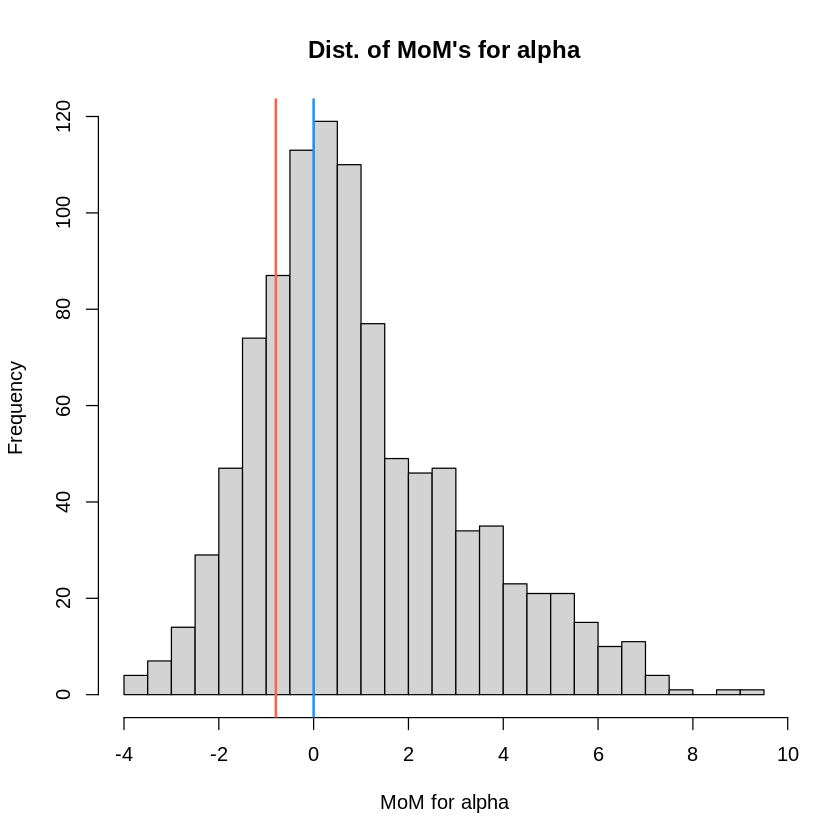

In [ ]:
#############################
# do not edit
# run the code cell as is
#############################
hist(mom.alpha,
     breaks = 20,
     xlab = "MoM for alpha",
     main = "Dist. of MoM's for alpha")
abline(v = 0, col = "dodgerblue", lwd = 2)  # plot at actual value of alpha
abline(v = -0.797, col = "tomato", lwd = 2)  # plot at estimated value of alpha

The distribution of $\hat{\beta}_{\rm{MoM}}$ values generated by the
code above is plotted in the histogram below.

-   A <font color="dodgerblue">blue vertical line</font> is drawn   at the actual value of $\color{dodgerblue}{\beta=11}$.
-   A <font color="tomato">red vertical line</font> is drawn at   the value of $\color{tomato}{\hat{\beta}_{\rm{MoM}}=11.297}$ we   found for the sample in [Question 4](#14q4).

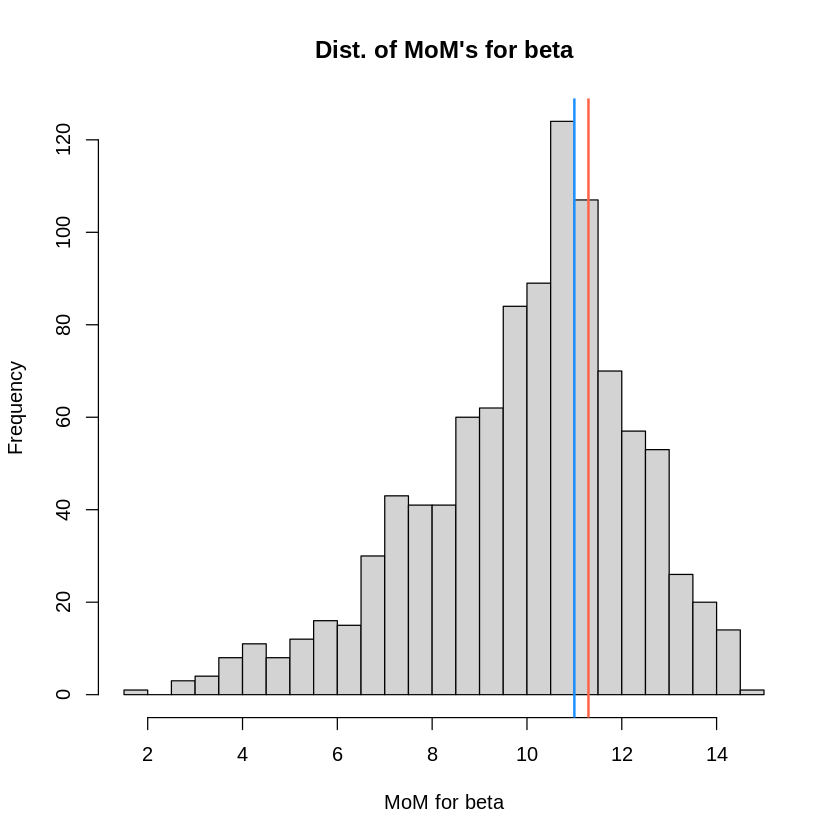

In [ ]:
#############################
# do not edit
# run the code cell as is
#############################
hist(mom.beta,
     breaks = 20,
     xlab = "MoM for beta",
     main = "Dist. of MoM's for beta")
abline(v = 11, col = "dodgerblue", lwd = 2)  # plot at actual value of beta
abline(v = 11.297, col = "tomato", lwd = 2)  # plot at estimated value of alpha

### <a name="14q7a">Question 7a</a>

---

Based on the plots of the sampling distributions for $\hat{\alpha}_{\rm{MoM}}$ and $\hat{\beta}_{\rm{MoM}}$ above:

-   Do you believe the MoM estimator for $\alpha$ is biased? Explain why or why not.
-   Do you believe the MoM estimator for $\beta$ is biased? Explain why or why not.
-   Base your answers on the distribution of all estimates, not just the red vertical lines corresponding to the sample from [Question 4](#14q4).

#### <a name="14sol7a">Solution to Question 7a</a>

---

<br>
<br>
<br>



### <a name="14q7b">Question 7b</a>

---

Check your answers in [Question 7a](#14q7a) more carefully using the MoM estimates stored in `mom.alpha` and `mom.beta`.

-   Hint: Recall an estimator $\hat{\theta}$ is unbiased if $E(\hat{\theta}) = \theta$.

#### <a name="14sol7b">Solution to Question 7b</a>

---

In [ ]:
# check whether or not each estimator is biased



<br>
<br>



### <a name="14q7c">Question 7c</a>

---

Which estimator, $\hat{\alpha}_{\rm{MoM}}$ or $\hat{\beta}_{\rm{MoM}}$, is more precise?

-   Hint: Recall the precision of an estimator $\hat{\theta}$ is often measured by $\mbox{Var}(\hat{\theta}) = \theta$.
-   Hint: Use R code and the MoM estimates stored in `mom.alpha` and `mom.beta`.

#### <a name="14sol7c">Solution to Question 7c</a>

---

In [ ]:
# check which estimator is more precise



<br>
<br>



### <a name="14q7d">Question 7d</a>

---

Adjust the sample size in the first line in the first code cell below to investigate what happens to the distributions of estimators $\hat{\alpha}_{\rm{MoM}}$ and $\hat{\beta}_{\rm{MoM}}$ for different sample sizes. In particular, as $n$ gets larger and larger:

-   Does each estimator seem to get more, less, or no change in bias?
-   Does each estimator get more, less, or no change in variability?
-   Does the shape of each distribution change?

#### <a name="14sol7d">Solution to Question 7d</a>

---

<br>

#### <a name="14q7d-n">Experiment with different sample sizes, $n$.</a>

---

In [ ]:
#######################
# adjust sample size
#######################
n <- 4  # sample size

#####################################
# do not edit the rest of the code
#####################################

mom.alpha <- numeric(1000)
mom.beta <- numeric(1000)

for (i in 1:1000)
{
  x.temp <- runif(n, 0, 11)  # generate random sample
  m1 <- sum(x.temp)/n  # first sample moment
  m2 <- sum(x.temp^2)/n  # second sample moment
  k <- sqrt(3) * sqrt(m2 - m1^2)  # compute sqrt(3)*(m2 - m1^2)
  mom.alpha[i] <- m1 - k  # enter formula for MoM estimate for alpha
  mom.beta[i] <- m1 + k  # enter formula for MoM estimate for beta
}

In [ ]:
##########################################
# sampling distribution for MoM of alpha
# do not edit cell, just run
##########################################
hist(mom.alpha,
     breaks = 20,
     xlab = "MoM for alpha",
     main = "Dist. of MoM's for alpha")
abline(v = 0, col = "dodgerblue", lwd = 2)  # plot at actual value of alpha

In [ ]:
##########################################
# sampling distribution for MoM of beta
# do not edit cell, just run
##########################################
hist(mom.beta,
     breaks = 20,
     xlab = "MoM for beta",
     main = "Dist. of MoM's for beta")
abline(v = 11, col = "dodgerblue", lwd = 2)  # plot at actual value of beta

<br>
<br>



##### <a name="1q7d-bias">Exploring Bias of Each Estimator</a>

---

-   As $n$ gets larger, does each estimator seem to get more, less, or   no change in bias?

In [ ]:
# check for change to bias



<br>
<br>



##### <a name="14q7d-eff">Exploring Variability of Estimators</a>

---

-   As $n$ gets larger, does each estimator get more, less, or no change in variability?

In [ ]:
# check for change in variability


<br>
<br>



##### <a name="14q7d-shape">Exploring the Shape of Sampling Distributions</a>

---

-   Does the shape of each distribution change as $n$ gets larger?

In [ ]:
# check for change in shape



<br>
<br>
<br>



# <a name="14CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.